In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("training.csv")

In [3]:
### Exploratory Data Analysis
dataset.info()
dataset.head()
# geohash6: location of demand (latitude and logitude)
# day: sequential order from 1 to 61
# timestamp: 15 minute interval
# demand: aggregated demand from 0 to 1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4206321 entries, 0 to 4206320
Data columns (total 4 columns):
geohash6     object
day          int64
timestamp    object
demand       float64
dtypes: float64(1), int64(1), object(2)
memory usage: 128.4+ MB


,geohash6,day,timestamp,demand
0,qp03wc,18,20:0,0.020072
1,qp03pn,10,14:30,0.024721
2,qp09sw,9,6:15,0.102821
3,qp0991,32,5:0,0.088755
4,qp090q,15,4:0,0.074468


In [4]:
dataset.describe()

,day,demand
count,4.206321e+06,4.206321e+06
mean,3.145299e+01,1.050907e-01
std,1.768278e+01,1.592655e-01
min,1.000000e+00,3.092217e-09
25%,1.600000e+01,1.867379e-02
50%,3.200000e+01,5.043463e-02
75%,4.700000e+01,1.208644e-01
max,6.100000e+01,1.000000e+00


In [5]:
# Number of unique locations
dataset['geohash6'].nunique()

1329

In [6]:
# Missing timestamp, interpret zero demand
# 1hour = 15mins x 4
# 1day = 4 x 24 = 96
# 61days = 96 *61 = 5856
# In 61 days, we expect 5856 rows for each geohash6
dataset.groupby(by=['geohash6']).count().head()

,day,timestamp,demand
geohash6,,,
qp02yc,577,577,577
qp02yf,89,89,89
qp02yu,2,2,2
qp02yv,7,7,7
qp02yy,106,106,106


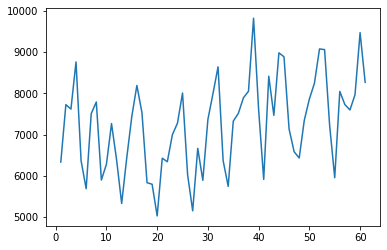

In [7]:
# Demand aggregated by day
demand_aggr = dataset.groupby(by=['day']).sum()
demand_aggr.sort_values(by=['day'], inplace=True)
plt.plot(demand_aggr)
plt.show()

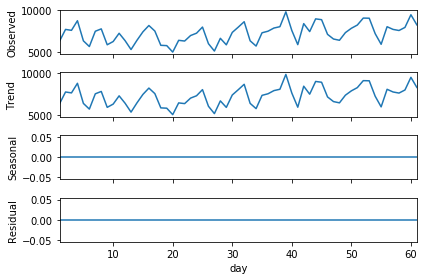

In [9]:
# Finding seasonality and trend of aggregated demand
from statsmodels.tsa.seasonal import seasonal_decompose
demand = seasonal_decompose(demand_aggr, model='additive', freq=1)
demand.plot()
plt.show()

In [10]:
from dateutil.parser import parse
dataset['hour'] = (dataset['timestamp'].apply(lambda x: x.split(":")[0])).astype(np.int16)

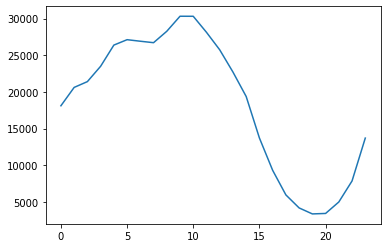

In [11]:
# Aggregated demand by hour
hour_aggr = dataset.groupby(by=['hour'])['demand'].sum()
plt.plot(hour_aggr)
plt.show()

In [12]:
# Please proceed with the 2nd notebook: 2_Preprocessing.ipynb